In [2]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# data load
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [7]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [9]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [13]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

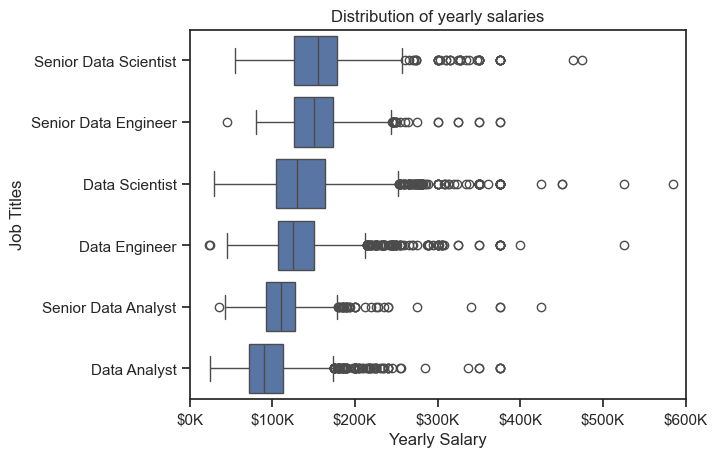

In [14]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Distribution of yearly salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Job Titles')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [16]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [18]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [21]:
df_DA_US_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_US_top_pay = df_DA_US_top_pay.head(10)

In [25]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
aws,75,92500.0
python,408,90000.0
tableau,398,90000.0
r,244,90000.0
sql,714,87500.0
power bi,279,87500.0
sas,200,84078.5
excel,472,77500.0
powerpoint,102,77500.0


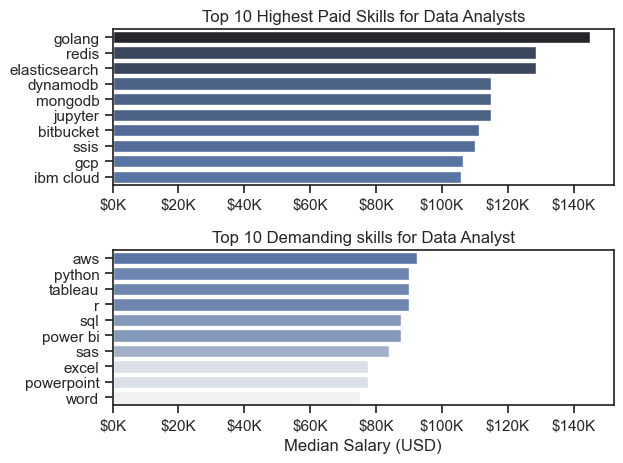

In [29]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].legend().remove()
ax[1].set_title('Top 10 Demanding skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()